In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

d = pd.read_csv('cleaned_kickstarterFinal.csv',encoding='latin1')

In [3]:
d.head()

,state,backers,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,...,main_category_Publishing,main_category_Technology,main_category_Theater,goal_cat_Low,goal_cat_Medium,goal_cat_VeryHigh,goal_cat_VeryLow,duration_cat_Medium,duration_cat_Short,duration_cat_VeryLong
0,0,15.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,3.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,224.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,1,16.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0


In [4]:
# Decisoin trees for backers included model 

from sklearn.cross_validation import train_test_split
X=d.drop('state',axis=1,)
y=d['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y )
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train,y_train)
prediction = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print (confusion_matrix(y_test,prediction))
print('\n')
print (classification_report(y_test,prediction))
print('\n')
print (accuracy_score(y_test,prediction))

C:\Users\AB Duke\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[[42962  3187]
 [ 3972 26945]]


             precision    recall  f1-score   support

          0       0.92      0.93      0.92     46149
          1       0.89      0.87      0.88     30917

avg / total       0.91      0.91      0.91     77066



0.9071055977992889


In [5]:
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.946
Accuracy on test set: 0.907


In [6]:
# Random forest for new backers data set

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000,criterion='gini')
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print (confusion_matrix(y_test,rfc_pred))
print('\n')
print (classification_report(y_test,rfc_pred))
print('\n')
print (accuracy_score(y_test,rfc_pred))



[[42612  3537]
 [ 3322 27595]]


             precision    recall  f1-score   support

          0       0.93      0.92      0.93     46149
          1       0.89      0.89      0.89     30917

avg / total       0.91      0.91      0.91     77066



0.9109983650377599


In [8]:
print("Accuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))

Accuracy on training set: 0.946
Accuracy on test set: 0.911


In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gradt=GradientBoostingClassifier(random_state=0,max_depth=3)
gradt.fit(X_train,y_train)
gradpred = gradt.predict(X_test)


In [11]:
print (confusion_matrix(y_test,gradpred))
print('\n')
print (classification_report(y_test,gradpred))
print('\n')
print (accuracy_score(y_test,gradpred))
print ('Accuracy on training set:{:.3f}'.format(gradt.score(X_train,y_train)))
print ('Accuracy on testing set:{:.3f}'.format(gradt.score(X_test,y_test)))


[[42609  3540]
 [ 2272 28645]]


             precision    recall  f1-score   support

          0       0.95      0.92      0.94     46149
          1       0.89      0.93      0.91     30917

avg / total       0.93      0.92      0.92     77066



0.9245841227000233
Accuracy on training set:0.924
Accuracy on testing set:0.925


In [10]:
#pca 2 comp
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X)
x_pca= pca.transform(X)
x_pca.shape

(256886, 4)

Text(0,0.5,'second PC')

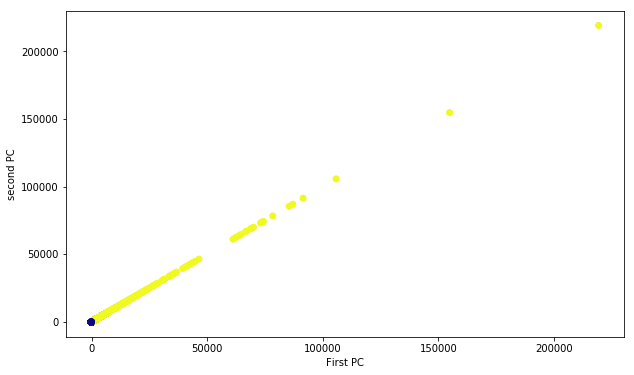

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,0],c=y,cmap='plasma')
plt.xlabel('First PC')
plt.ylabel('second PC')

In [12]:
pca.components_

array([[ 9.99999999e-01,  2.12912065e-08, -1.09929911e-06,
        -5.98135024e-07,  1.30931443e-05, -3.02211313e-06,
        -8.83931940e-06, -3.01853005e-06,  2.57180018e-05,
        -3.02590745e-07, -9.43143331e-06, -1.44362447e-06,
        -6.71414682e-06,  2.27956186e-06, -1.73626791e-06,
        -1.57274893e-05, -9.53415477e-06,  2.92495254e-05,
        -1.22836936e-05,  1.68605747e-06, -8.10408919e-07,
        -1.09832263e-06],
       [ 2.29349728e-06,  1.59615157e-05,  1.94982946e-04,
        -1.49433949e-05, -3.38746357e-04, -1.80574109e-03,
        -7.72016477e-05,  5.47649482e-04, -3.64327772e-04,
        -1.37673430e-04,  2.81161326e-04,  1.16659997e-04,
         1.88794530e-03, -1.60530144e-03,  1.06463159e-03,
        -5.73800666e-03,  7.04735626e-03, -4.44523018e-03,
         1.31685867e-03, -8.60534684e-01,  3.54208107e-01,
         3.65925336e-01],
       [ 6.57246259e-06,  8.92839870e-04, -1.68269594e-03,
        -1.19480484e-03, -6.85742086e-03,  3.73998446e-03,
    

In [14]:
df_comp = pd.DataFrame(pca.components_,columns=list(X))
df_comp

,backers,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,...,main_category_Publishing,main_category_Technology,main_category_Theater,goal_cat_Low,goal_cat_Medium,goal_cat_VeryHigh,goal_cat_VeryLow,duration_cat_Medium,duration_cat_Short,duration_cat_VeryLong
0,1.000000,2.129121e-08,-0.000001,-5.981350e-07,0.000013,-0.000003,-0.000009,-0.000003,0.000026,-3.025907e-07,...,-0.000007,0.000002,-0.000002,-0.000016,-0.000010,0.000029,-0.000012,0.000002,-8.104089e-07,-0.000001
1,0.000002,1.596152e-05,0.000195,-1.494339e-05,-0.000339,-0.001806,-0.000077,0.000548,-0.000364,-1.376734e-04,...,0.001888,-0.001605,0.001065,-0.005738,0.007047,-0.004445,0.001317,-0.860535,3.542081e-01,0.365925
2,0.000007,8.928399e-04,-0.001683,-1.194805e-03,-0.006857,0.003740,-0.019168,-0.001270,0.009886,-1.088568e-04,...,0.046688,-0.041931,-0.005538,-0.494662,0.831085,-0.236009,-0.060956,0.009215,1.258112e-03,-0.006364
3,0.000034,2.017827e-02,0.006339,8.110235e-03,-0.083100,0.005661,-0.189498,-0.048477,-0.032933,-6.832059e-04,...,0.093280,-0.168462,0.021224,0.587939,0.131548,-0.670864,-0.005375,0.000655,-4.414962e-03,0.002784


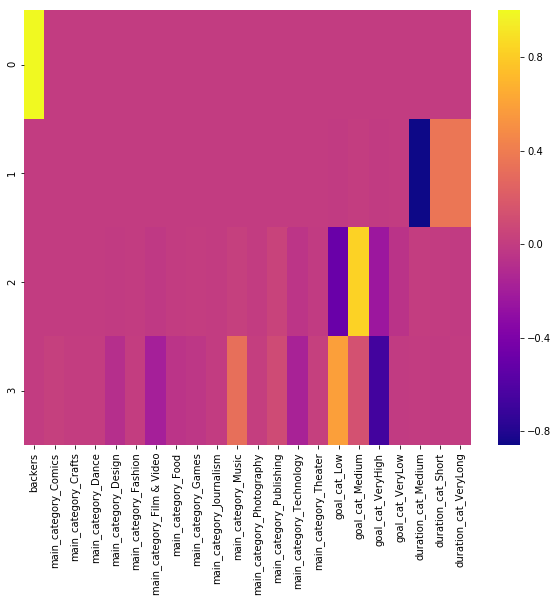

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df_comp,cmap='plasma')

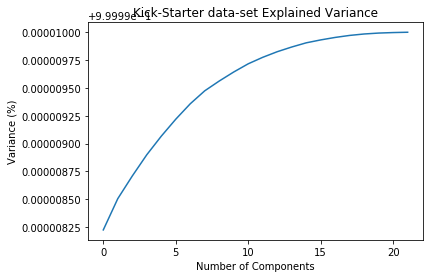

In [17]:
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Kick-Starter data-set Explained Variace')
plt.show()